
# Tecnicatura Universitaria en Inteligencia Artificial. Programación II. 2023


# Trabajo Práctico:Introducción al Análisis de Datos.


# Integrantes:

1.   Facundo Geuna G-5905/6
2. Eugenio Bravi B-6600/1


#1. Carga de datos

In [ ]:
import pandas as pd
!gdown 15iK8dYJVgKwp64o4qIFNipTFm4pBexY1

data = pd.read_csv('servicio_meteorologico.csv', encoding='ISO-8859-1')
data

Downloading...
From: https://drive.google.com/uc?id=15iK8dYJVgKwp64o4qIFNipTFm4pBexY1
To: /content/servicio_meteorologico.csv
100% 59.8k/59.8k [00:00<00:00, 66.5MB/s]


Estacin                                     Valor Medio de   Ene  \
0     LA QUIACA OBS.                             Temperatura (grados C)  12.8   
1     LA QUIACA OBS.                      Temperatura mxima (grados C)  20.1   
2     LA QUIACA OBS.                      Temperatura mnima (grados C)   7.4   
3     LA QUIACA OBS.                               Humedad relativa (%)  65.3   
4     LA QUIACA OBS.                        Velocidad del Viento (km/h)   6.9   
..               ...                                                ...   ...   
587  BASE SAN MARTIN                               Humedad relativa (%)   S/D   
588  BASE SAN MARTIN                        Velocidad del Viento (km/h)  14.6   
589  BASE SAN MARTIN                          Nubosidad total (octavos)   6.2   
590  BASE SAN MARTIN                                 Precipitacin (mm)   S/D   
591  BASE SAN MARTIN  Frecuencia de das con Precipitacin superior ...   S/D   

      Feb   Mar   Abr   May   Jun   Jul   Ago   Sep   Oct   Nov   Dic  
0    12.5  12.4  10.9   6.9   4.4   4.1   6.7   9.3  11.7  12.8  13.2  
1    19.9  19.9  19.7  17.3  15.6  15.4  17.4  19.2  21.1  21.7  21.3  
2     7.0   6.3   2.8  -3.0  -6.2  -6.8  -4.2  -1.1   2.8   5.2   6.9  
3    64.1  62.4  48.2  34.6  31.1  30.1  31.7  34.4  45.3  52.3  59.2  
4     7.1   6.5   6.4   6.0   4.9   6.6   6.6   8.6   8.7   8.8   8.3  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
587   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D  
588  17.7  22.3  20.4  19.3  18.0  17.3  18.9  17.5  20.3  19.2  18.3  
589   6.5   6.3   6.0   5.8   5.2   5.5   5.9   6.3   6.4   6.4   6.2  
590   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D  
591   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D   S/D  

[592 rows x 14 columns]

#2. Limpieza de datos

In [ ]:
#Chequeo de valores nan
data.isna().any()

Estacin          False
Valor Medio de    False
Ene               False
Feb               False
Mar               False
Abr               False
May               False
Jun               False
Jul               False
Ago               False
Sep               False
Oct               False
Nov               False
Dic               False
dtype: bool

Esto significa que no hay datos nulos o mejor llamados Nan en Pandas. Pero igualmente se puede observar que hay faltante de datos y en lugar de ser nulos, estan representados con 'S/D'. Vamos a eliminar las filas que contengan mas de 4 'S/D' ya que no aportan mucha información y si se los rellena con el valor promedio de los demas datos de la fila van a aportar resultados con mucho sesgo.

In [ ]:
#Reemplazo los valores "S/D" con nan
data = data.replace("S/D", pd.NA)
#Elimino las filas que tengan mas de 4 nan
data = data.dropna(thresh=10)
data = data.reset_index(drop=True)
data

Estacin                 Valor Medio de   Ene   Feb   Mar   Abr  \
0     LA QUIACA OBS.         Temperatura (grados C)  12.8  12.5  12.4  10.9   
1     LA QUIACA OBS.  Temperatura mxima (grados C)  20.1  19.9  19.9  19.7   
2     LA QUIACA OBS.  Temperatura mnima (grados C)   7.4   7.0   6.3   2.8   
3     LA QUIACA OBS.           Humedad relativa (%)  65.3  64.1  62.4  48.2   
4     LA QUIACA OBS.    Velocidad del Viento (km/h)   6.9   7.1   6.5   6.4   
..               ...                            ...   ...   ...   ...   ...   
554  BASE SAN MARTIN         Temperatura (grados C)   2.0   0.9  -1.2  -3.3   
555  BASE SAN MARTIN  Temperatura mxima (grados C)   4.5   3.3   1.3  -0.9   
556  BASE SAN MARTIN  Temperatura mnima (grados C)  -0.3  -1.3  -3.6  -5.8   
557  BASE SAN MARTIN    Velocidad del Viento (km/h)  14.6  17.7  22.3  20.4   
558  BASE SAN MARTIN      Nubosidad total (octavos)   6.2   6.5   6.3   6.0   

      May    Jun    Jul    Ago    Sep    Oct   Nov   Dic  
0     6.9    4.4    4.1    6.7    9.3   11.7  12.8  13.2  
1    17.3   15.6   15.4   17.4   19.2   21.1  21.7  21.3  
2    -3.0   -6.2   -6.8   -4.2   -1.1    2.8   5.2   6.9  
3    34.6   31.1   30.1   31.7   34.4   45.3  52.3  59.2  
4     6.0    4.9    6.6    6.6    8.6    8.7   8.8   8.3  
..    ...    ...    ...    ...    ...    ...   ...   ...  
554  -5.3   -9.3  -11.6  -11.5   -8.9   -5.9  -2.0   0.8  
555  -2.3   -5.8   -7.3   -6.9   -4.6   -2.1   1.2   3.4  
556  -8.4  -13.5  -16.3  -16.8  -13.9  -10.2  -5.5  -1.8  
557  19.3   18.0   17.3   18.9   17.5   20.3  19.2  18.3  
558   5.8    5.2    5.5    5.9    6.3    6.4   6.4   6.2  

[559 rows x 14 columns]

In [ ]:
#Obtenemos los primeros 5 valores de la columna 'Ene' en una lista
data['Ene'].head(5).tolist()

['12.8', '20.1', '7.4', '65.3', '6.9']

Los valores de las columnas de los meses son del tipo de dato string.





In [ ]:
#convierto los datos a tipo numerico
data.iloc[:, 2:] = data.iloc[:, 2:].apply(pd.to_numeric)
#Relleno los valores faltantes con el promedio de la fila
data = data.where(data.notna(), data.iloc[:, 2:].mean(axis=1).round(1), axis=0)
data

Estacin                 Valor Medio de   Ene   Feb   Mar   Abr  \
0     LA QUIACA OBS.         Temperatura (grados C)  12.8  12.5  12.4  10.9   
1     LA QUIACA OBS.  Temperatura mxima (grados C)  20.1  19.9  19.9  19.7   
2     LA QUIACA OBS.  Temperatura mnima (grados C)   7.4   7.0   6.3   2.8   
3     LA QUIACA OBS.           Humedad relativa (%)  65.3  64.1  62.4  48.2   
4     LA QUIACA OBS.    Velocidad del Viento (km/h)   6.9   7.1   6.5   6.4   
..               ...                            ...   ...   ...   ...   ...   
554  BASE SAN MARTIN         Temperatura (grados C)   2.0   0.9  -1.2  -3.3   
555  BASE SAN MARTIN  Temperatura mxima (grados C)   4.5   3.3   1.3  -0.9   
556  BASE SAN MARTIN  Temperatura mnima (grados C)  -0.3  -1.3  -3.6  -5.8   
557  BASE SAN MARTIN    Velocidad del Viento (km/h)  14.6  17.7  22.3  20.4   
558  BASE SAN MARTIN      Nubosidad total (octavos)   6.2   6.5   6.3   6.0   

      May   Jun   Jul   Ago   Sep   Oct   Nov   Dic  
0     6.9   4.4   4.1   6.7   9.3  11.7  12.8  13.2  
1    17.3  15.6  15.4  17.4  19.2  21.1  21.7  21.3  
2    -3.0  -6.2  -6.8  -4.2  -1.1   2.8   5.2   6.9  
3    34.6  31.1  30.1  31.7  34.4  45.3  52.3  59.2  
4     6.0   4.9   6.6   6.6   8.6   8.7   8.8   8.3  
..    ...   ...   ...   ...   ...   ...   ...   ...  
554  -5.3  -9.3 -11.6 -11.5  -8.9  -5.9  -2.0   0.8  
555  -2.3  -5.8  -7.3  -6.9  -4.6  -2.1   1.2   3.4  
556  -8.4 -13.5 -16.3 -16.8 -13.9 -10.2  -5.5  -1.8  
557  19.3  18.0  17.3  18.9  17.5  20.3  19.2  18.3  
558   5.8   5.2   5.5   5.9   6.3   6.4   6.4   6.2  

[559 rows x 14 columns]

In [ ]:
#corregir las palabras mal escritas en la columna Valor Medio de
cambios_valores = {
    "mxima": "máxima",
    "mnima": "mínima",
    "Precipitacin": "Precipitación",
    "das": "días",
    }
cambios_columna = {
    "Estacin": "Estación"
    }

#reemplazo
data.rename(columns=cambios_columna, inplace=True)
data.replace(cambios_valores, regex=True, inplace=True)
data

Estación                 Valor Medio de   Ene   Feb   Mar   Abr  \
0     LA QUIACA OBS.         Temperatura (grados C)  12.8  12.5  12.4  10.9   
1     LA QUIACA OBS.  Temperatura máxima (grados C)  20.1  19.9  19.9  19.7   
2     LA QUIACA OBS.  Temperatura mínima (grados C)   7.4   7.0   6.3   2.8   
3     LA QUIACA OBS.           Humedad relativa (%)  65.3  64.1  62.4  48.2   
4     LA QUIACA OBS.    Velocidad del Viento (km/h)   6.9   7.1   6.5   6.4   
..               ...                            ...   ...   ...   ...   ...   
554  BASE SAN MARTIN         Temperatura (grados C)   2.0   0.9  -1.2  -3.3   
555  BASE SAN MARTIN  Temperatura máxima (grados C)   4.5   3.3   1.3  -0.9   
556  BASE SAN MARTIN  Temperatura mínima (grados C)  -0.3  -1.3  -3.6  -5.8   
557  BASE SAN MARTIN    Velocidad del Viento (km/h)  14.6  17.7  22.3  20.4   
558  BASE SAN MARTIN      Nubosidad total (octavos)   6.2   6.5   6.3   6.0   

      May   Jun   Jul   Ago   Sep   Oct   Nov   Dic  
0     6.9   4.4   4.1   6.7   9.3  11.7  12.8  13.2  
1    17.3  15.6  15.4  17.4  19.2  21.1  21.7  21.3  
2    -3.0  -6.2  -6.8  -4.2  -1.1   2.8   5.2   6.9  
3    34.6  31.1  30.1  31.7  34.4  45.3  52.3  59.2  
4     6.0   4.9   6.6   6.6   8.6   8.7   8.8   8.3  
..    ...   ...   ...   ...   ...   ...   ...   ...  
554  -5.3  -9.3 -11.6 -11.5  -8.9  -5.9  -2.0   0.8  
555  -2.3  -5.8  -7.3  -6.9  -4.6  -2.1   1.2   3.4  
556  -8.4 -13.5 -16.3 -16.8 -13.9 -10.2  -5.5  -1.8  
557  19.3  18.0  17.3  18.9  17.5  20.3  19.2  18.3  
558   5.8   5.2   5.5   5.9   6.3   6.4   6.4   6.2  

[559 rows x 14 columns]

#3. Análisis Descriptivo

A continuación detallaremos las columnas que hay en el archivo y qué representa cada una:


1.   Estacion: nombre de la estación que mide las diferentes variables
2.   Valor medio de: es el valor medio de cada variable meteorologica y en que se mide
3.   Columnas mes: son doce columnas diferentes que representan cada mes del año



In [ ]:
import matplotlib.pyplot as plt

def resumen_estadistico(data, variable, ylabel):
    print(f"Estadisticas de resumen de la variable {variable}")

    columnas = ['Valor Medio de', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    data_describe = data[columnas]
    data_describe = data_describe[data_describe['Valor Medio de'] == variable]
    estadisticas = data_describe.describe().round(1)

    plt.figure(figsize=(8, 4))
    data_describe[columnas[1:]].boxplot()
    plt.title(variable +" en todos los meses")
    plt.xlabel("Mes")
    plt.ylabel(ylabel)
    plt.show()

    return estadisticas

Estadisticas de resumen de la variable Temperatura (grados C)


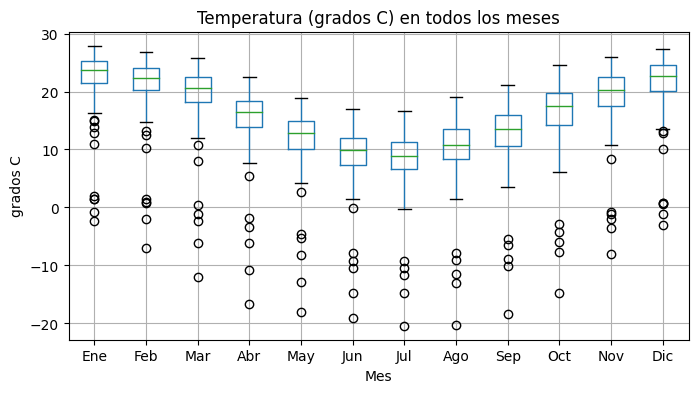

Ene   Feb   Mar   Abr   May   Jun   Jul   Ago   Sep   Oct   Nov   Dic
count  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0
mean   21.7  20.5  18.5  14.7  11.1   8.3   7.6   9.7  12.1  15.7  18.4  20.8
std     6.8   6.8   7.2   7.2   6.8   6.7   6.8   7.2   7.1   7.4   6.9   6.8
min    -2.4  -7.0 -12.0 -16.7 -18.1 -19.1 -20.4 -20.2 -18.4 -14.8  -8.0  -3.0
25%    21.5  20.3  18.2  13.9  10.1   7.3   6.7   8.4  10.5  14.2  17.4  20.1
50%    23.8  22.4  20.6  16.6  12.8  10.0   9.0  10.8  13.6  17.4  20.2  22.6
75%    25.3  24.1  22.5  18.3  15.0  12.0  11.3  13.6  15.9  19.8  22.4  24.6
max    27.9  26.8  25.8  22.5  18.9  17.0  16.6  19.1  21.2  24.6  25.9  27.4

In [ ]:
resumen_estadistico(data, "Temperatura (grados C)", "grados C" )

Analizando un poco este gráfico podemos observar que por ejemplo, en el mes de Enero, muchos de los valores estan dispersos por debajo de la media y tambien hay valores atípicos, remarcados con un circulo pequeño. Creo que podemos sacar la conclusión de como tenemos un pais muy extenso, las temperaturas varian mucho dependiendo de la ubicación geográfica y de la estación del año en la que nos encontremos. En el sur de nuestro país tenemos temperaturas muy bajas en Enero inclusive por ejemplo. Tambien podemos observar que las temperaturas suben a medida que los cambios de temperatura a lo largo del año coinciden con las estaciones climaticas de verano, otoño, invierno y primavera

In [ ]:
resumen_estadistico(data, "Temperatura máxima (grados C)", "grados C" )

Estadisticas de resumen de la variable Temperatura mínima (grados C)


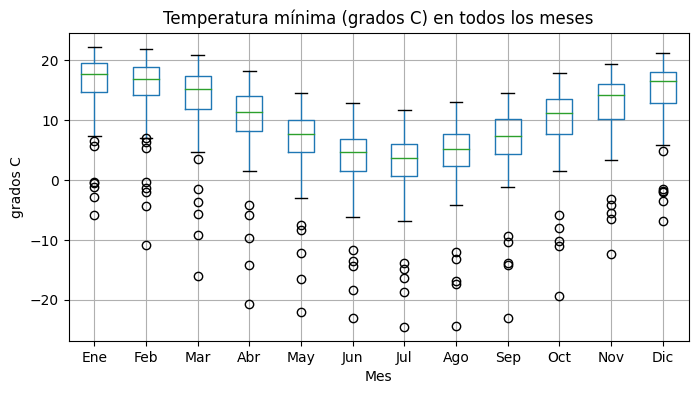

Ene   Feb   Mar   Abr   May   Jun   Jul   Ago   Sep   Oct   Nov   Dic
count  72.0  72.0  72.0  72.0  72.0  72.0  72.0  72.0  72.0  72.0  72.0  72.0
mean   15.7  14.8  13.2   9.5   6.1   3.4   2.4   3.9   6.0   9.5  12.2  14.5
std     6.2   6.4   7.0   7.1   6.7   6.7   6.8   6.9   6.8   7.0   6.5   6.2
min    -5.9 -10.9 -16.1 -20.7 -22.0 -23.1 -24.5 -24.4 -23.0 -19.4 -12.3  -6.9
25%    14.7  14.2  11.9   8.2   4.6   1.5   0.6   2.4   4.4   7.7  10.2  12.8
50%    17.8  16.9  15.3  11.4   7.6   4.6   3.8   5.2   7.4  11.3  14.2  16.6
75%    19.6  18.9  17.4  14.0  10.1   6.8   6.0   7.7  10.3  13.6  16.1  18.1
max    22.3  21.9  20.9  18.2  14.6  12.9  11.7  13.1  14.5  17.9  19.4  21.3

In [ ]:
resumen_estadistico(data, "Temperatura mínima (grados C)", "grados C" )

In [ ]:
resumen_estadistico(data, "Humedad relativa (%)", "Porcentaje %"  )

Estadisticas de resumen de la variable Velocidad del Viento (km/h)


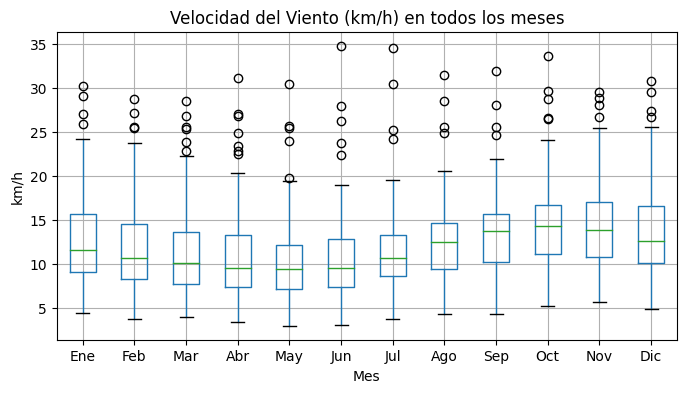

Ene   Feb   Mar   Abr   May   Jun   Jul   Ago   Sep   Oct   Nov   Dic
count  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0  63.0
mean   13.1  12.4  11.9  11.4  10.8  11.1  11.8  12.9  13.8  15.1  15.0  14.2
std     6.1   6.0   6.0   6.3   5.7   6.1   5.8   5.4   5.3   6.0   5.9   6.3
min     4.4   3.8   4.0   3.4   3.0   3.1   3.8   4.3   4.3   5.2   5.7   4.9
25%     9.1   8.4   7.8   7.4   7.2   7.4   8.6   9.4  10.2  11.2  10.8  10.1
50%    11.6  10.7  10.1   9.6   9.4   9.5  10.7  12.5  13.8  14.3  13.9  12.6
75%    15.7  14.6  13.7  13.4  12.1  12.9  13.2  14.6  15.6  16.8  17.0  16.6
max    30.2  28.8  28.5  31.1  30.5  34.8  34.5  31.5  31.9  33.6  29.6  30.8

In [ ]:
resumen_estadistico(data, "Velocidad del Viento (km/h)", "km/h" )

En todos los meses, existen valores atípicos y podemos asociar que son valores donde la velocidad del viento aumenta gracias a las tormentas que se forman.

In [ ]:
resumen_estadistico(data, "Nubosidad total (octavos)", "octavos" )

Estadisticas de resumen de la variable Precipitación (mm)


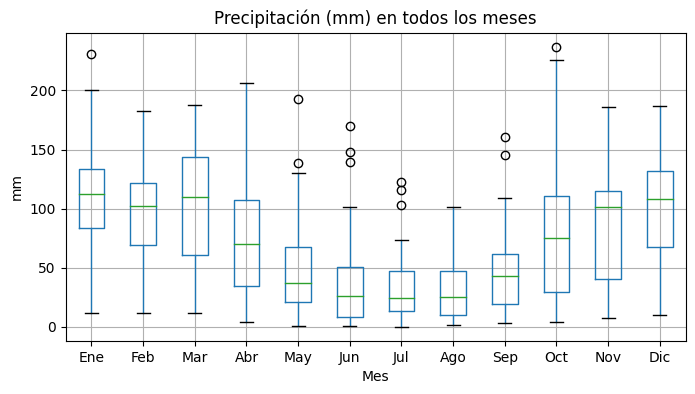

Ene    Feb    Mar    Abr    May    Jun    Jul    Ago    Sep    Oct  \
count   67.0   67.0   67.0   67.0   67.0   67.0   67.0   67.0   67.0   67.0   
mean   104.8   96.3  102.6   78.8   49.5   35.3   31.3   30.3   46.2   77.4   
std     50.2   45.3   48.4   53.0   37.4   35.6   26.3   24.4   32.6   51.1   
min     11.6   11.9   11.2    4.4    1.0    0.5    0.0    1.4    3.5    3.6   
25%     83.9   68.8   60.4   34.4   21.3    8.4   13.2    9.6   19.0   29.3   
50%    112.3  102.5  109.6   70.4   36.8   25.8   23.9   24.9   43.1   74.7   
75%    133.1  121.5  144.0  107.4   67.4   50.6   47.4   47.1   61.7  110.6   
max    230.6  182.8  187.7  206.6  192.7  170.1  122.1  101.4  160.3  237.0   

         Nov    Dic  
count   67.0   67.0  
mean    87.0   98.2  
std     48.3   48.9  
min      7.0   10.1  
25%     40.6   67.6  
50%    101.1  108.4  
75%    114.9  131.5  
max    186.3  186.9

In [ ]:
resumen_estadistico(data, "Precipitación (mm)", "mm" )

Podemos apreciar que los meses en donde mas precipitaciones hay son los que corresponden a la primavera y al verano. También se observa que durante el invierno no llueve mucho, pero hay valores atípicos donde hubo una cantidad de precipitaciones mucho mayor al máximo.

In [ ]:
resumen_estadistico(data, "Frecuencia de días con Precipitación superior a 0.1 mm", "mm" )

#4. Análisis Temporal

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

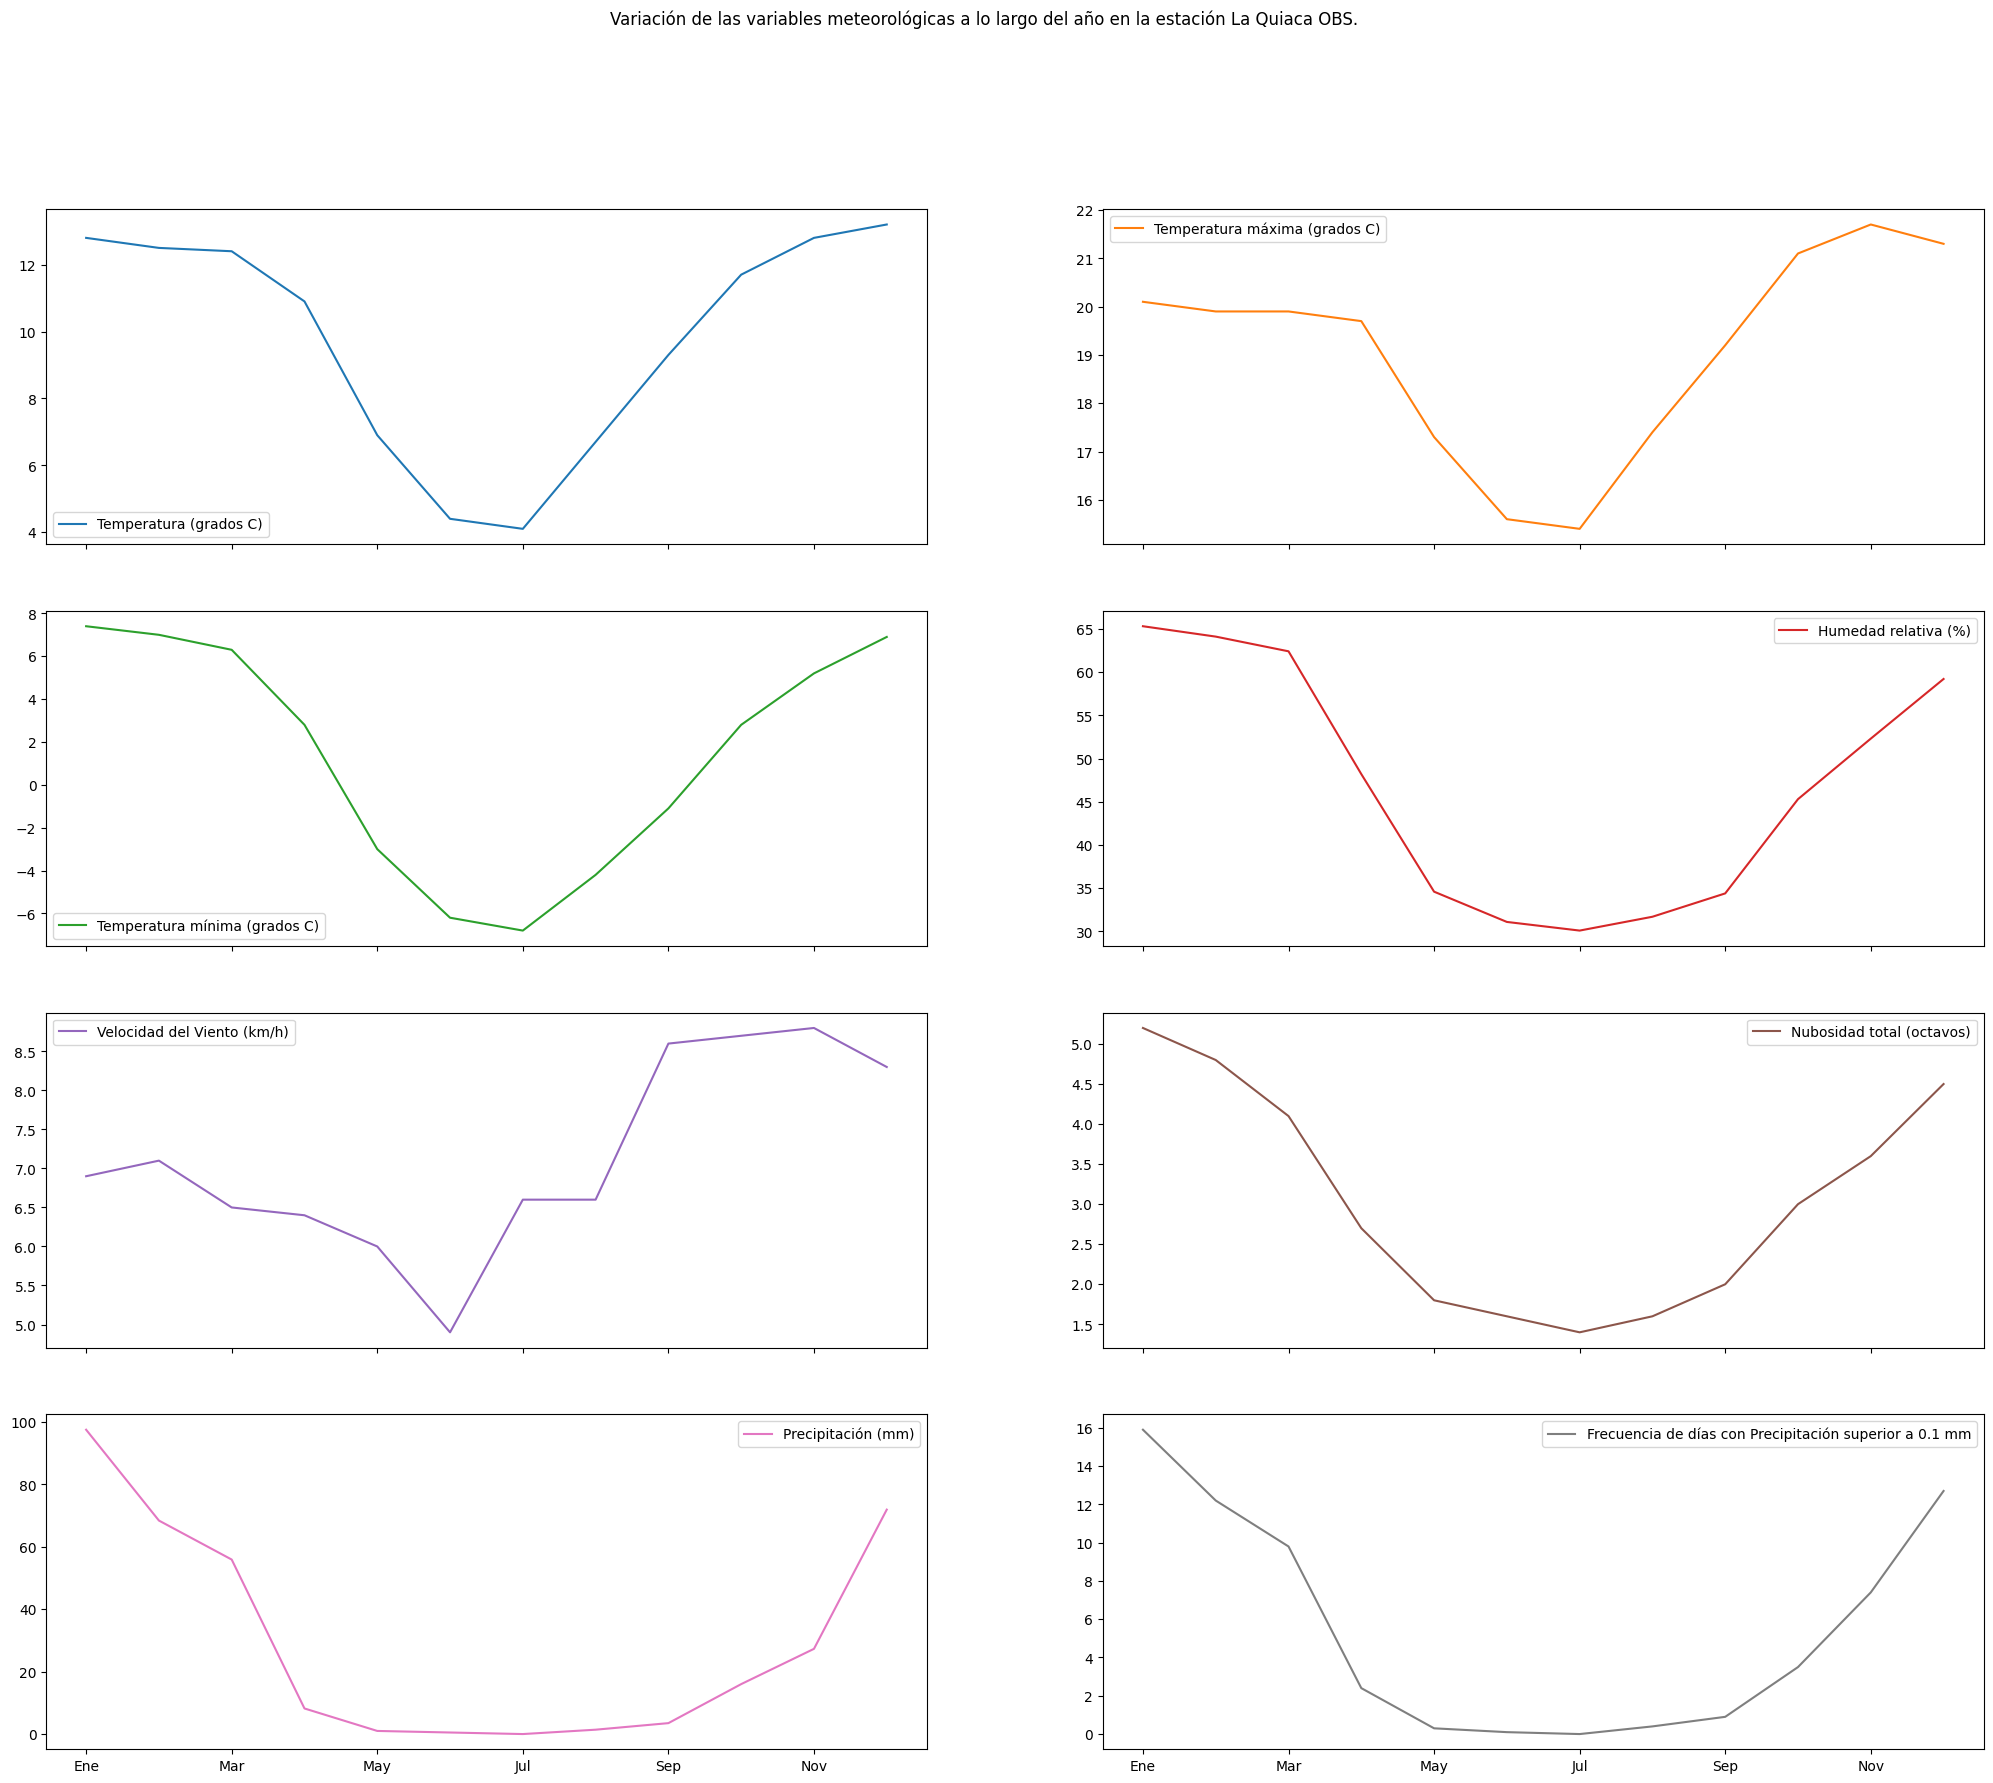

In [ ]:
#Análisis temporal de las variables meteorológicas a lo largo del año de la estacion 'LA QUIACA OBS'
analisis_temporal = data[ (data['Estación'] == 'LA QUIACA OBS.')].loc[:, data.columns != 'Estación'].set_index("Valor Medio de").T
analisis_temporal.plot(subplots=True, figsize=(25, 20),layout=(4,2), title=('Variación de las variables meteorológicas a lo largo del año en la estación La Quiaca OBS.'))

En estos graficos se puede observar como en los meses de verano todas las variables alcanzan su maximo con las variables con mas temperatura y con mas precipitaciones , en los meses de otoño la temperatura y las precipitaciones empiezan a bajar hasta alcanzar su minimo en invierno, y en los meses de primavera las variables empiezan a subir nuevamente.

#5. Preguntas de Investigación

In [ ]:
#A-¿Cuál fue la estacion que tuvo el mayor valor medio de Temperatura en el año?

#filtramos las filas donde "Valor Medio de" es "Temperatura (grados C)"
filas_temperatura = data[data["Valor Medio de"] == "Temperatura (grados C)"]
#separa el max de cada estacion en todos los meses y luego devuelve el indice del mayor de todos
fila_maximo_temperatura = filas_temperatura.iloc[:, 2:].max(axis=1).idxmax()
nombre_estacion_mayor_temp = data.loc[fila_maximo_temperatura, "Estación"]
maxima_temperatura = data.loc[fila_maximo_temperatura].iloc[2:].max()
print(f'La estacion con mayor valor medio de temperatura fue la estacion: {nombre_estacion_mayor_temp}\nCon una temperatura de {maxima_temperatura}°')

La estacion con mayor valor medio de temperatura fue la estacion: LAS LOMITAS
Con una temperatura de 27.9°


In [ ]:
#B-¿Cuál fue el menor valor promedio de Velocidad del Viento (km/h) en Enero de todas las estaciones?
minimo = data[data["Valor Medio de"] == 'Velocidad del Viento (km/h)']["Ene"].min()
print(f"El menor valor medio de velocidad del viento fue de {minimo}(km/h) ")


El menor valor medio de velocidad del viento fue de 4.4(km/h) 


In [ ]:
#C-¿Cuál fue el mayor valor medio de Humedad relativa (%) en Septiembre de todas las estaciones?
maximo = data[data["Valor Medio de"] == 'Humedad relativa (%)']["Sep"].max()
print(f"El mayor valor medio de humedad relativa en el mes de Septiembre fue de {maximo}%")


El mayor valor medio de humedad relativa en el mes de Septiembre fue de 82.1%


In [ ]:
#D- ¿Cuál fue la temperatura promedio durante un mes específico?
temperatura_promedio_enero = data[data['Valor Medio de'] == 'Temperatura (grados C)']['Ene'].mean().round(1)
print(f'La temperatura promedio del mes de Enero fue de {temperatura_promedio_enero}°')

La temperatura promedio del mes de Enero fue de 21.7°


In [ ]:
#E- ¿Cuál fue el mes más lluvioso del año?
promedio_lluvia = data[data['Valor Medio de'] == 'Precipitación (mm)'].iloc[:,2:].mean()
mes_mas_lluvioso = promedio_lluvia[promedio_lluvia == promedio_lluvia.max()].first_valid_index()
print(f'El mes más lluvioso fue: {mes_mas_lluvioso} \nCon una cantidad promedio de {promedio_lluvia.max().round(1)} mm')

El mes más lluvioso fue: Ene 
Con una cantidad promedio de 104.8 mm
